In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sub = pd.read_csv("sample_submission.csv")
sub.head()

,id,Strength
0,5407,35.452
1,5408,35.452
2,5409,35.452
3,5410,35.452
4,5411,35.452


In [4]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


In [5]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,5407,166.1,75.4,163.8,173.8,4.6,1007.2,746.6,56
1,5408,304.0,0.0,0.0,190.0,0.0,998.0,801.0,7
2,5409,225.0,0.0,0.0,185.0,0.0,1113.0,833.0,28
3,5410,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,100
4,5411,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28


In [6]:
print(train_df.shape)
print(test_df.shape)
print(sub.shape)

(5407, 10)
(3605, 9)
(3605, 2)


In [7]:
print('Train_data: \n')
print(train_df.isnull().sum())
print('\n Test_data : \n')
print(test_df.isnull().sum())
print('\n Data Info : \n')
print(train_df.info())


Train_data: 

id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

 Test_data : 

id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
dtype: int64

 Data Info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5407 non-null   int64  
 1   CementComponent            5407 non-null   float64
 2   Bla

In [8]:
print(' Data description : \n')
print(train_df.describe())


 Data description : 

                id  CementComponent  BlastFurnaceSlag  FlyAshComponent  \
count  5407.000000      5407.000000       5407.000000      5407.000000   
mean   2703.000000       299.168189         58.610579        31.872795   
std    1561.010784       105.537682         83.417801        54.605003   
min       0.000000       102.000000          0.000000         0.000000   
25%    1351.500000       213.700000          0.000000         0.000000   
50%    2703.000000       297.200000          0.000000         0.000000   
75%    4054.500000       375.000000        122.600000        79.000000   
max    5406.000000       540.000000        359.400000       200.100000   

       WaterComponent  SuperplasticizerComponent  CoarseAggregateComponent  \
count     5407.000000                5407.000000               5407.000000   
mean       185.076235                   4.108441                992.000718   
std         18.517583                   5.692296                 77.148010   

<Axes: xlabel='Strength', ylabel='Count'>

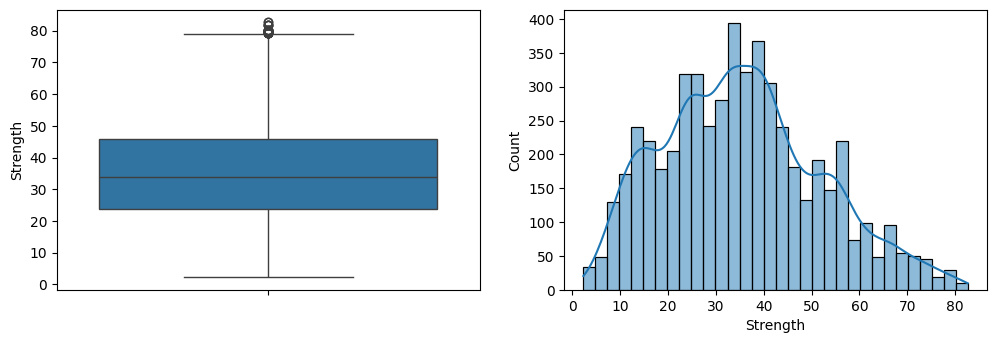

In [9]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(train_df['Strength'])


plt.subplot(2, 2, 2)
# sns.histplot(train_df['Strength'])
sns.histplot(train_df['Strength'],kde=True)

# plt.subplot(2, 2,3)
# sns.histplot(train_df['Strength'])

In [10]:

print(f"Strength statistics:")
print(f"Mean: {train_df['Strength'].mean():.2f}")
print(f"Median: {train_df['Strength'].median():.2f}")
print(f"Std: {train_df['Strength'].std():.2f}")
print(f"Min: {train_df['Strength'].min():.2f}")
print(f"Max: {train_df['Strength'].max():.2f}")

Strength statistics:
Mean: 35.45
Median: 33.95
Std: 16.40
Min: 2.33
Max: 82.60


In [11]:
print(train_df.columns)

Index(['id', 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')


In [12]:
# define dependent and independent
X = train_df.drop(columns=['id','Strength'])
y = train_df['Strength']


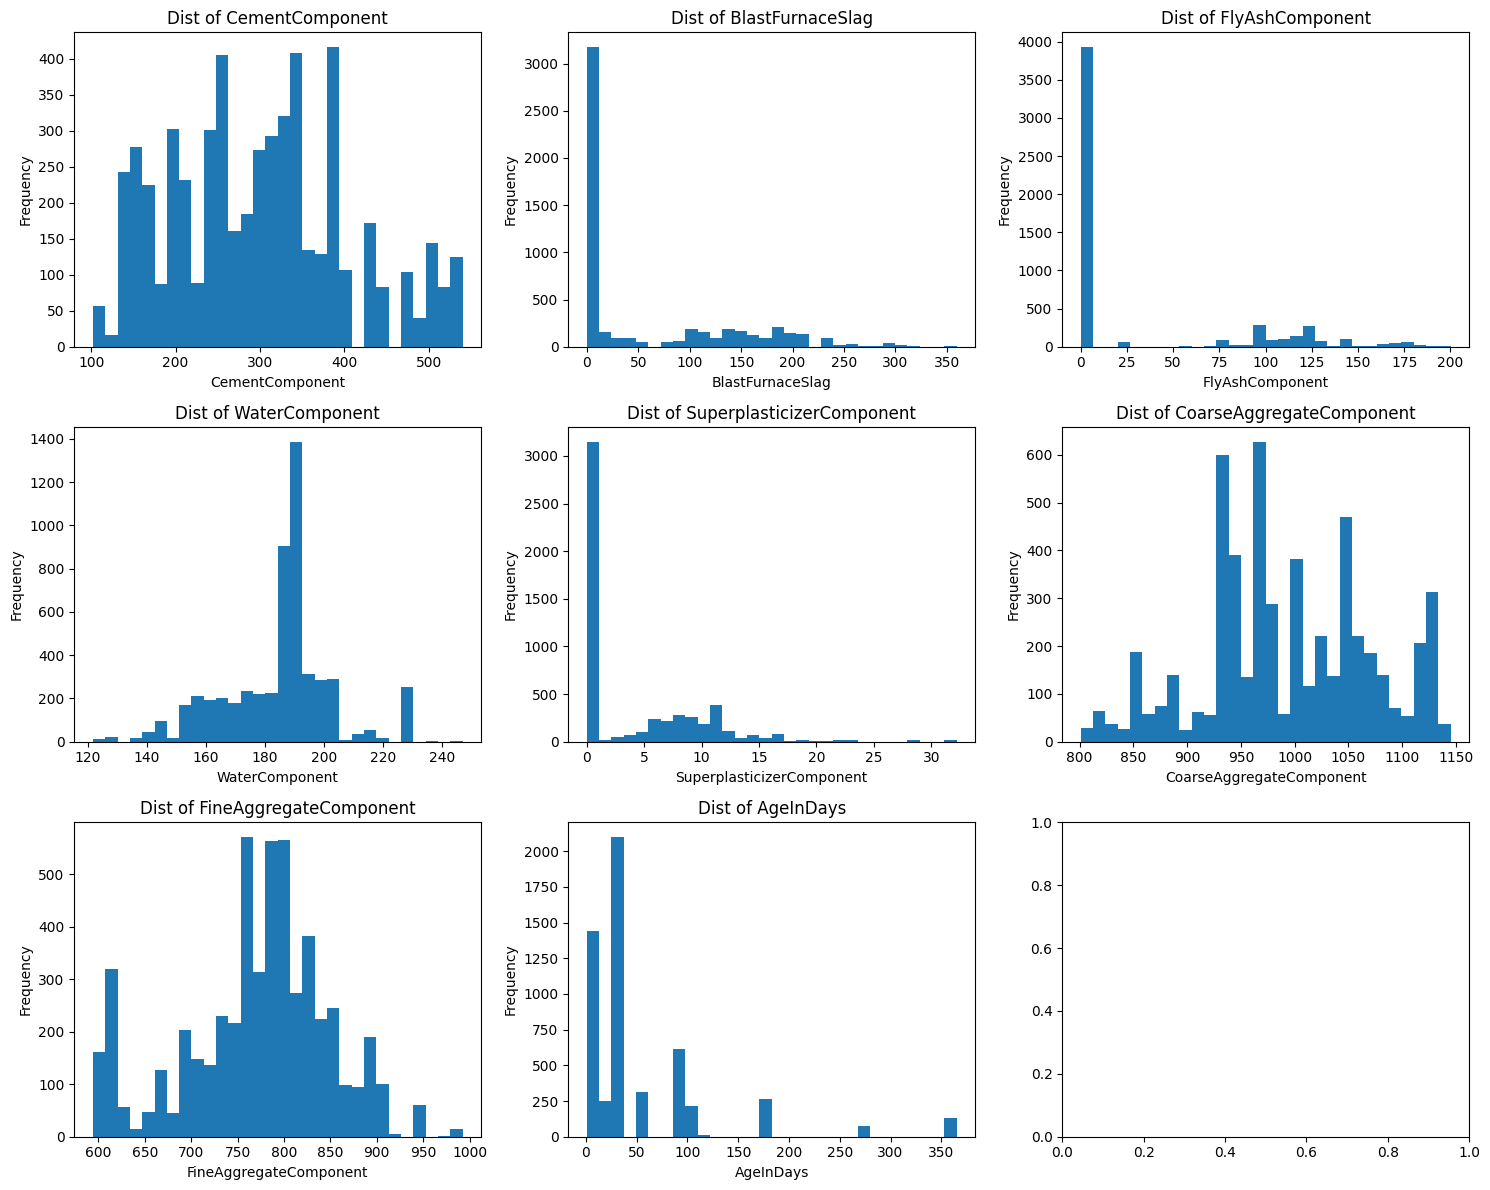

In [13]:

fig, axes = plt.subplots(3, 3, figsize=(15, 12))

axes = axes.ravel() # flattens the subplots

for i,col in enumerate(X.columns):
    axes[i].hist(train_df[col] ,bins = 30,) # alpha to make hist visible ->alpha=0.7
    axes[i].set_title(f'Dist of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [14]:
# X.hist(bins=50,figsize=(20,15))  # same as upper one

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

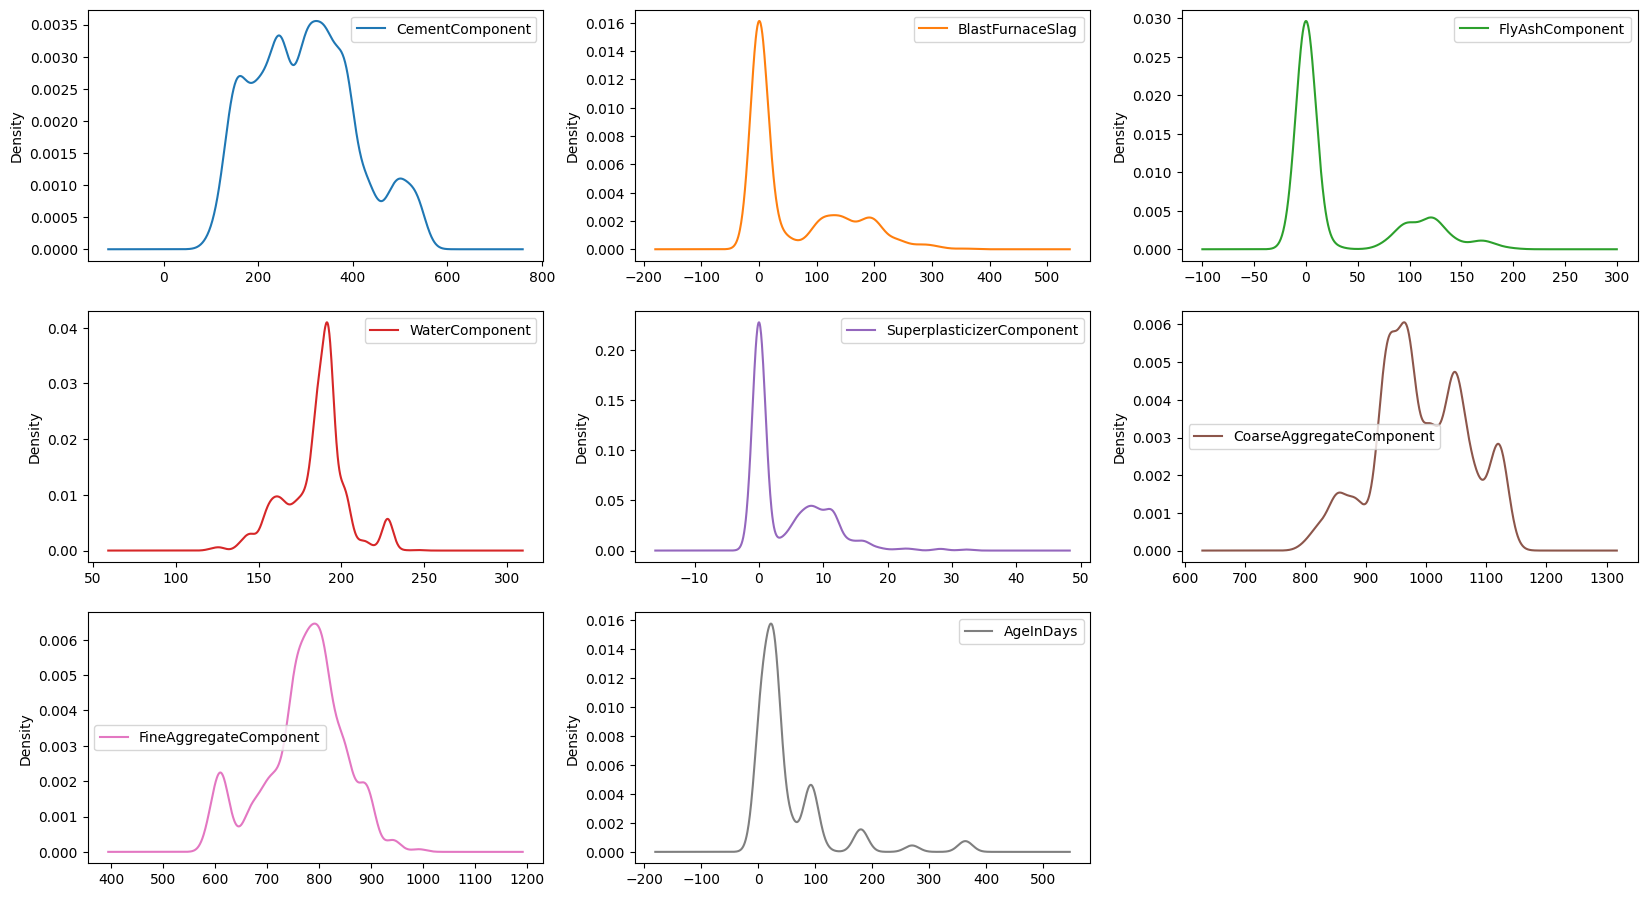

In [15]:
X.plot(kind='density',subplots=True,layout=(4,3),figsize=(20, 15),sharex=False)

<Axes: >

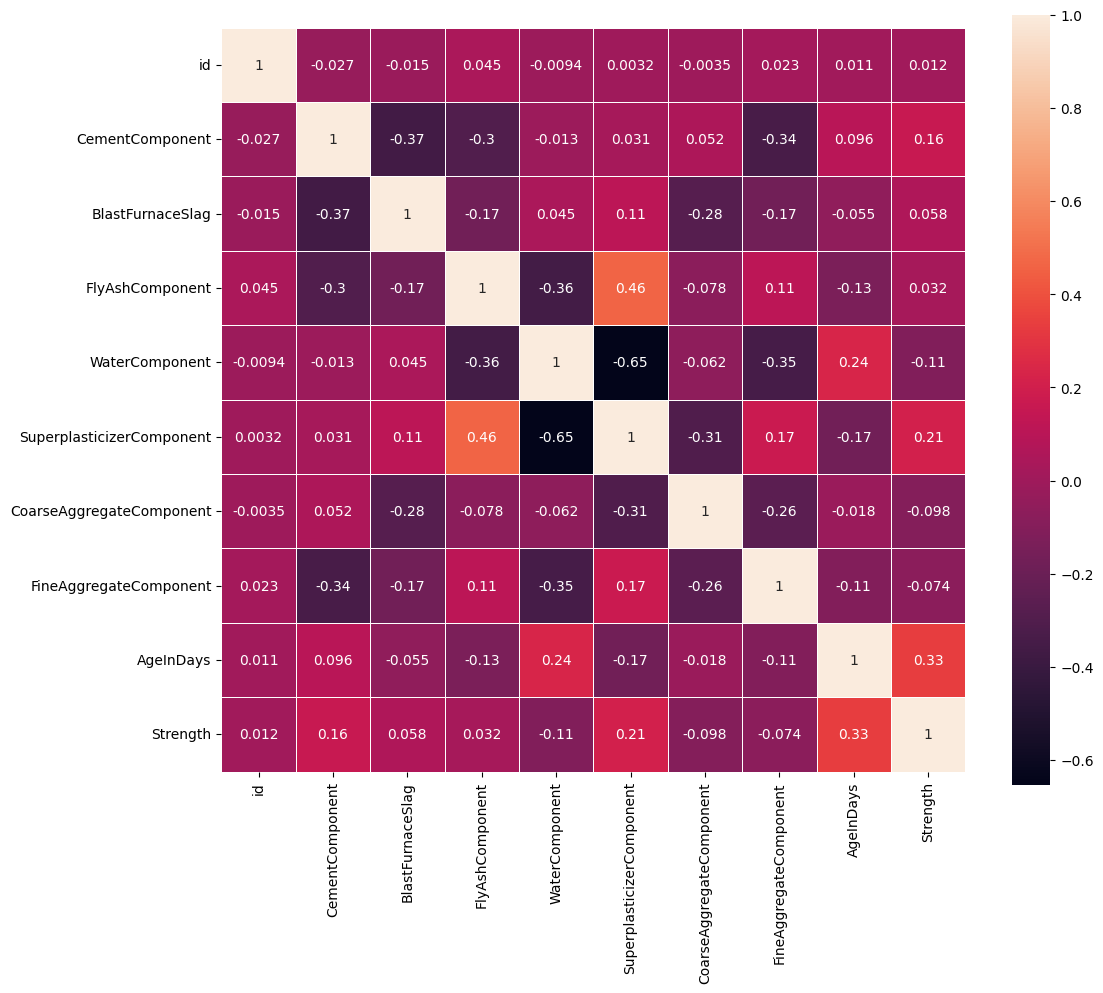

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(),annot=True,linewidths=0.5,square=True )

            

In [17]:
print("\nCorrelations with Strength (target variable):")
target_correlations = train_df.corr()['Strength'].sort_values(ascending=False)
print(target_correlations)


Correlations with Strength (target variable):
Strength                     1.000000
AgeInDays                    0.334204
SuperplasticizerComponent    0.208249
CementComponent              0.158000
BlastFurnaceSlag             0.057506
FlyAshComponent              0.031606
id                           0.011853
FineAggregateComponent      -0.073900
CoarseAggregateComponent    -0.098410
WaterComponent              -0.113678
Name: Strength, dtype: float64


<Axes: >

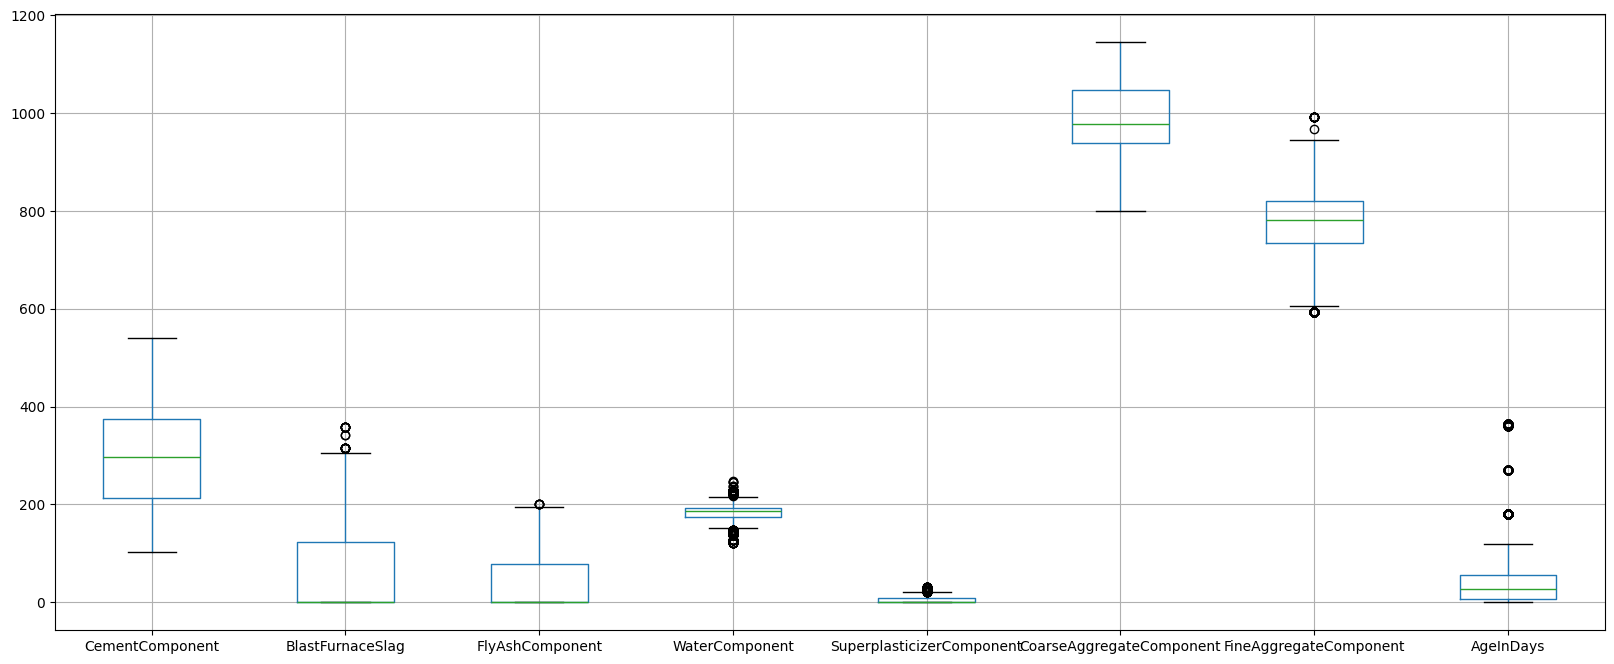

In [59]:
X.boxplot(figsize=(20,8))

In [19]:
# test train split
from sklearn.model_selection import train_test_split


In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_scaled = scaler.transform(test_df.drop(columns=["id"]))

In [23]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(4055, 8)
(1352, 8)


In [24]:
# model fitting
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=1)

In [25]:
lr.fit(X_train_scaled,y_train)
print("Linear Regression model trained successfully!")

Linear Regression model trained successfully!


In [26]:
from sklearn.model_selection import cross_val_score
validation_score =  cross_val_score(lr,X_train_scaled,y_train,scoring='neg_root_mean_squared_error',cv=3)

In [27]:
y_pred = lr.predict(X_test_scaled)
y_pred

array([26.26933709, 30.19179076, 40.27493868, ..., 40.94230151,
       34.54469439, 35.89774217], shape=(1352,))

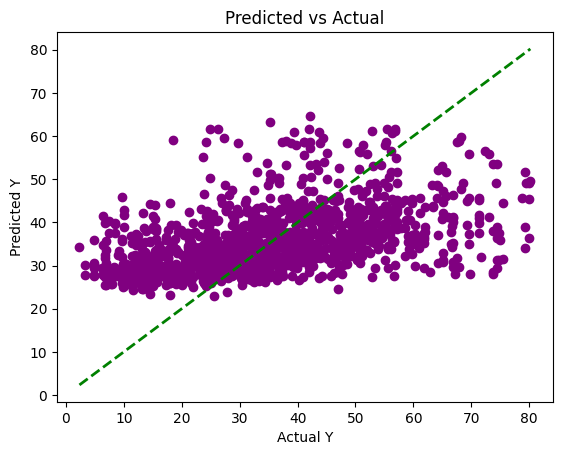

In [28]:
y_pred = lr.predict(X_test_scaled)

plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'g--', lw=2)
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Predicted vs Actual")
plt.show()


Text(0, 0.5, 'Residuals')

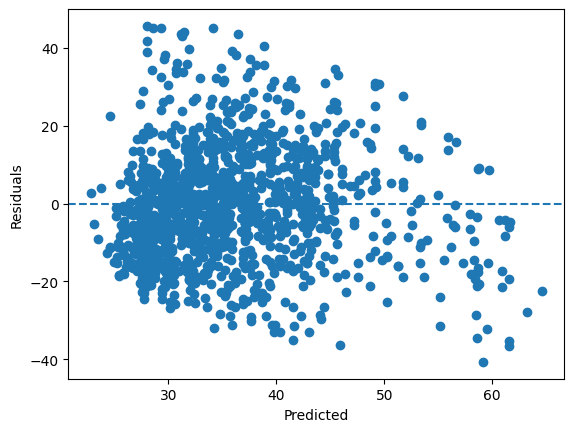

In [29]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals); plt.axhline(0, ls='--'); plt.xlabel('Predicted'); plt.ylabel('Residuals')


In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly = PolynomialFeatures(degree=2,include_bias=True)


In [32]:
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [33]:
from sklearn.metrics import r2_score,root_mean_squared_error
regressior = LinearRegression()
regressior.fit(X_train_poly, y_train)
y_predicted = regressior.predict(X_test_poly)
scores=r2_score(y_test,y_pred)
print(scores)

0.22871889098001064


In [34]:
rmse  = root_mean_squared_error(y_test,y_predicted)
rmse

12.926966138000465

In [35]:
# y_test

In [36]:
# from sklearn.metrics import root_mean_squared_error ,mean_squared_error,mean_absolute_error,r2_score

In [37]:
# # Calculate metrics
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"\nModel Performance on Validation Set:")
# print(f"Mean Squared Error (MSE): {mse:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"R² Score: {r2:.4f}")

In [38]:
# rmse = root_mean_squared_error(y_test,y_pred)
# rmse

In [39]:
# y_pred.shape

In [40]:
# from sklearn.linear_model import Ridge,Lasso

In [41]:
# rid = Ridge()
# lass = Lasso()

In [42]:
# lass.fit(X_train_scaled,y_train)

In [43]:
# rid.fit(X_train_scaled,y_train)

In [44]:
# y_pred_lasso = lass.predict(X_test_scaled)

In [45]:
# y_pred_rid = rid.predict(X_test_scaled)

In [46]:
# y_pred_rid.shape

In [47]:

# print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
# print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
#             np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
#             mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
     

In [48]:

# print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
# print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
#             np.sqrt(mean_squared_error(y_test, y_pred_rid)),mean_squared_error(y_test, y_pred_rid),
#             mean_absolute_error(y_test, y_pred_rid), r2_score(y_test, y_pred_rid)))

In [49]:
# test_preds = lr.predict(test_scaled)
# test_preds.shape

In [50]:
test_predicted = regressior.predict(poly.transform(test_scaled))
test_predicted.shape

(3605,)

In [51]:
rmse

12.926966138000465

In [52]:
# submission = pd.DataFrame({
#     "id": test_df["id"],
#     "Strength": test_predicted
# })
# submission.to_csv("submission.csv", index=False)
# print("Submission file saved as submission.csv")
